# Assignment 3 – Topic Modeling and Clustering for Online Social Media Data

*Due: Friday January 10 at 17:00 CET*

In the third assignment of the course Applications of Machine Learning (INFOB3APML), you will learn to use topic modeling and clustering to identify topics in online social media data. The objectives of this assignment are:
- understand and process the text data
- use the clustering algorithm to determine clusters in real-life data
- use the Latent Dirichlet Allocation algorithm to identify discussed topics in real-life text data 
- use the visualization tools to validate the results of unsupervised learning and interpret your findings
- reflect on the difference between two type of unsupervised learning algorithms

In this assignment, you are going to discover the different ‘topics’ from a real social media text dataset. The project is divided into two parts (4 subtasks):

- The first part contains data processing (1.1) and feature extraction (1.2) from the raw text data.
- In the second part, you will implement two methods (2.1), a topic modeling method and a clustering method, to identify topics from the processed data. Then, the evaluation will be done by using visualization tools (2.2). 

Provided files:
- The dataset: data/raw_data.txt
- A tutorial notebook showcases some packages you could use for this assignment (optional): Ass3_tutorial.ipynb
- Some sample visualization codes for interpreting the topic results: viz_example.ipynb

In [46]:
import io
import preprocessor as p
import tqdm
import spacy
from spacy.lang.nl.examples import sentences
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
nlp = spacy.load("nl_core_news_sm")

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

 ## Dataset:
 The data used in this assignment is Dutch text data. We collected the COVID-19 crisis related messages from online social media (Twitter) from January to November 2021. Then, a subset of raw tweets was randomly sampled. In total, our dataset includes the text data of about 100K messages. **To protect the data privacy, please only use this dataset within the course.**

In [2]:
# read the data

def phase0_open_txt_stream(filename):
    return io.open(filename, "r", encoding="utf-8")


pipe = phase0_open_txt_stream("raw_data.txt")

for i in range(3):
    print(next(pipe))
    print("")

pipe.close()


Hahah, het verzet is begonnen. Het knalt hier op z'n best hoor. Voor mijn dieren vind ik het erg, maar f@ck die maffe regering hier. Gelukkig nieuwjaar!


RT @D66Vught: Het is 2021! https://t.co/LpPuFPuqR8


@MijumewAndCo Happy new year mij!




 ## 0. Before you start the Project: 
 The provided messages in the raw dataset were collected based on 10 different themes that relate to the COVID-19 crisis. Here is a list of all themes:
 -	Lockdown
 -	Face mask
 -	Social distancing
 -	Loneliness
 -	Happiness
 -	Vaccine
 -	Testing
 -  Curfew
 -  Covid entry pass
 -  Work from home

Before starting your project, you need to first filter the messages (all messages are in Dutch) and use the messages belonging to only one theme for the topic identification. 
 
If you have submitted the theme preference, you can skip the following paragraph.

*Please notice that there will be maximum two teams working on a same theme. In this way, we hope that each group will develop their own dataset and come up with interesting results.*

 ## 1.1 Data Processing
 In the first part of the assignment, please first filter the messages and use the messages belonging to your allocated theme for the identification of topics. For that you will need to:
 -	Design your query (e.g. a regular expression or a set of keywords) and filter the related messages for your allocated theme. 
 -	Clean your filtered messages and preprocess them into the right representation. Please refer to the text data pre-processing and representation methods discussed in the lecture. You may use some of the recommended packages for text data preprocessing and representation.

In [39]:
# TODO: filter the related messages

# filter tweets with keywords
keywords = ['entry', 'entry passes', 'toegangspas','coronabewijs','vaccine bewijs','vaccine certificaat'
            ,'coronatoegangsbewijzen','coronetoegangsbewijs','CTB','certificaat','CoronaCheck','QR','QR-code'
            ,'toegangsbewijs','bewijs', 'vaccinatie', "qr code", "pass"
            ]

data_file = 'raw_data.txt'
tweets = []

with open(data_file, encoding='utf-8') as fin:
    for line in fin:
        line = line.replace('\\n', ' ')
        line = ' '.join(line.lower().strip().split()) #change all the text to lower
        for keyword in keywords:
            if keyword in line:
                tweets.append(line)
                break

print(len(tweets))

# TODO: clean and preprocess the messages
# Clean tweets by removing URLs, emojis, reserved words, smileies, numbers
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.RESERVED, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.NUMBER)

tweets = [p.clean(tweet) for tweet in tweets]

processed_tweets = []
for tweet in tqdm.tqdm(tweets[:2000]):
    tweet = nlp(tweet)
    processed_tweet = []
    for token in tweet:
        if token.is_stop:  # remove stop words
            continue
        if token.is_punct:  # remove punctuations
            continue
        processed_tweet.append(token.lemma_)  # lemmatization
    processed_tweet = ' '.join(processed_tweet)
    processed_tweets.append(processed_tweet)

for tweet in processed_tweets[:10]:
    print(tweet)

# TODO: represent the messages into formats that can be used in clustering or LDA algorithms (you may need different represention for two algorithms)

11991


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:42<00:00, 47.41it/s]

vaccinatie zeggen corona krijgen
Nederland eindigen woningnood record aantalal daklozen ondermijn rechtsstaat miljoen mens armoede dood enig jaar wwii corona vaccinatie verantwoordelijk premier koerst verkiezingsoverwinning mooi land
waartoe immuunsysteem staat vaccinatie beogen Jan leggen simpel
wakker Nederland gommer kuiper vaccinatiestrategie vaccination corona denkgroot
natuurlijk fan virologie moeilijk voorstellen virolog n manier huidig vaccinatiestrategie juist vinden draad
hangen hoever mens down The rabbit hole punt waarop informatie aanreiken kwaad goed gaan klein groep zover weten goed manier groot detail uitlegg gevolg niet-vaccinatie dierbaren
zot huisartsen/ziekenhuizen meewerken vaccinatie drift kabinet ruten werken medicijn vaccin aanprijzen verbieden medici/zorgpersoneel schenden massaal eed plus mens grondrecht vaccinatieplicht
berhaupt bewijs virus veel verspreiden verspreiden komen minderheid regel houden uitziet werken mondkap week lockdown
twee golf verpleeghuize

In [40]:
# Bag-of-words representation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(processed_tweets)
bow_array = bow.toarray()
print(bow_array) # print the rusult, the array of BoW
print(bow_array.shape) # check the shape of the array
                       # there are 2000 tweets and 7093 unique 
feature_names = vectorizer.get_feature_names_out() # get the name of the feature
print(feature_names)
print(bow.__dir__())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(2000, 7093)
['00' '000vpk' '004' ... 'zzp' 'zzzzzz' 'één']
['_shape', 'maxprint', 'indices', 'indptr', 'data', '__module__', '__doc__', '_bsr_container', '_coo_container', '_csc_container', '_csr_container', '_dia_container', '_dok_container', '_lil_container', '__mul__', '__rmul__', '__pow__', 'set_shape', 'get_shape', 'shape', 'asfptype', 'getmaxprint', 'getformat', 'getnnz', 'getH', 'getcol', 'getrow', '__dict__', '__weakref__', '__new__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__init__', '__reduce_ex__', '__reduce__', '__getstate__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__', '_format', '__getitem__', '__setitem__', 'transpose', 'tolil', 'tocsr', 'tocsc', 'tobsr', '_swap', '__iter__', '_getrow', '_getcol', '_

In [42]:
# TF-IDF representation
from sklearn.feature_extraction.text import TfidfTransformer

# Transform BoW representation into TF-IDF
tfidf = TfidfTransformer().fit_transform(bow)
tfidf_array = tfidf.toarray()

print(feature_names)
print(tfidf_array)  # TF-IDF array
print(tfidf_array.shape)  # check the shape

print(tfidf.__dir__())

['00' '000vpk' '004' ... 'zzp' 'zzzzzz' 'één']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2000, 7093)
['_shape', 'maxprint', 'indices', 'indptr', 'data', '__module__', '__doc__', '_bsr_container', '_coo_container', '_csc_container', '_csr_container', '_dia_container', '_dok_container', '_lil_container', '__mul__', '__rmul__', '__pow__', 'set_shape', 'get_shape', 'shape', 'asfptype', 'getmaxprint', 'getformat', 'getnnz', 'getH', 'getcol', 'getrow', '__dict__', '__weakref__', '__new__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__init__', '__reduce_ex__', '__reduce__', '__getstate__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__', '_format', '__getitem__', '__setitem__', 'transpose', 'tolil', 'tocsr', 'tocsc', 'tobsr', '_swap', 

In [54]:
# Word Embeddings (Word2Vec, skip-gram) representation 
# Lecture 11, reference: https://radimrehurek.com/gensim/models/word2vec.html

# Tokenize tweets
tokenized_tweets = [tweet.split() for tweet in processed_tweets]

model = Word2Vec(sentences=tokenized_tweets, 
                 vector_size=100, window=5,
                 min_count=1, workers=4, sg=1)
model.save("word2vec_skipgram_model")

# Example: Get the vector for a word and find the similar words
vector = model.wv['pass']
print(f"Vector for 'pass': \n{vector}")
similar_words = model.wv.most_similar('pass', topn=5)
print(f"Most similar words to 'pass': \n{similar_words}")

Vector for 'pass': 
[ 0.00101171  0.03541949  0.03533472  0.02029822  0.05069738 -0.12226636
  0.02930128  0.14843476 -0.04844894 -0.0272179  -0.03660754 -0.1251563
 -0.01607583  0.02637279 -0.00775746 -0.03454957  0.03094207 -0.08639663
 -0.02396404 -0.18132462  0.03239032  0.05449386  0.05665772 -0.06408999
 -0.02695757  0.04363116 -0.02031141 -0.00465995 -0.05587658 -0.0225175
  0.05533911  0.02002862  0.0358622  -0.02013853 -0.01884503  0.1090029
  0.00566018 -0.08888073 -0.05139685 -0.10676073  0.02104154 -0.09903022
 -0.04977025  0.03490658  0.08685875 -0.00881005 -0.06603229  0.00873844
  0.03115202  0.05571008  0.02296318 -0.07285566 -0.00070933 -0.02261264
 -0.0420155   0.02828959  0.02976149 -0.01544665 -0.07818652  0.08167026
  0.04009253  0.00681389 -0.00699555  0.0129357  -0.05585039  0.05984348
  0.03152046  0.03679096 -0.09617974  0.10733199 -0.02766486  0.04298169
  0.07075088 -0.0199826   0.05682804  0.01549714  0.07330341 -0.04161813
 -0.05171283 -0.01953775 -0.038975

 ## 1.2 Exploratory Data Analysis
 After preprocessing the data, create at least 2 figures or tables that help you understand the data.

 While exploring the data, you may also think about questions such as:
 - Can you spot any differences between Twitter data and usual text data?
 - Does your exploration reveal some issues that would make it difficult to interpret the topics?
 - Can you improve the data by adding additional preprocessing steps?

(-0.5, 399.5, 199.5, -0.5)

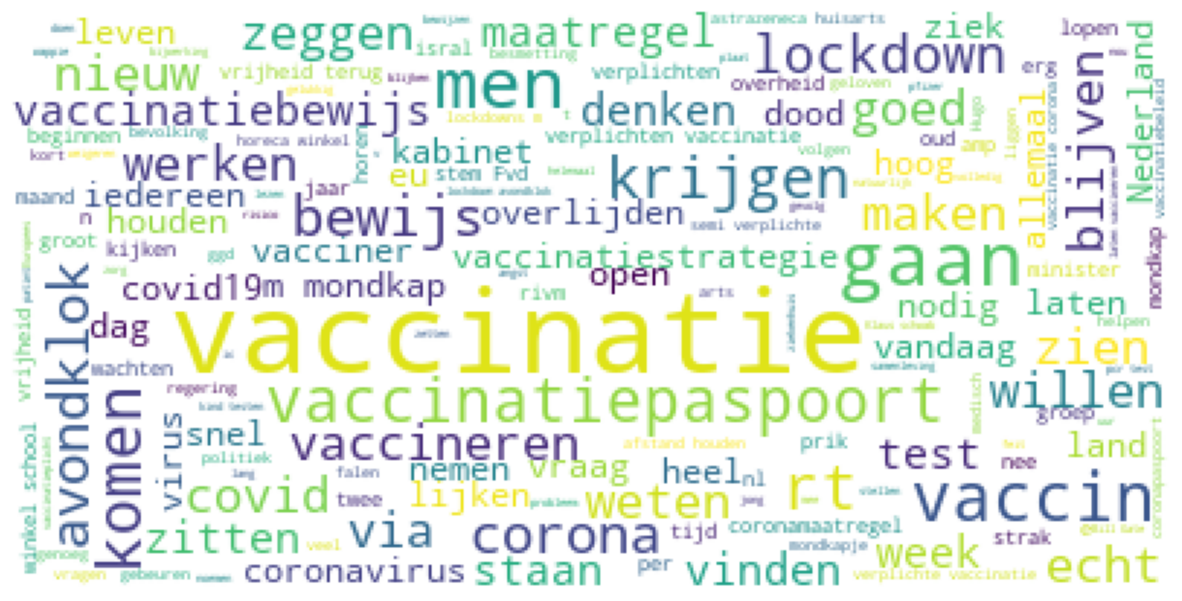

In [34]:
# TODO: plot figure(s) with preprocessing data
# figure 1 ((base on BoW))
wordcloud = WordCloud(background_color='white', max_words=500,
                      max_font_size=40, random_state=100)
wordcloud.generate(' '.join(processed_tweets))
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.imshow(wordcloud)
ax.axis('off')

## show the frequence of the word in the document
## tip to improve the preprocessing: notice the space will iinfluence the reslut. 
## like "qr code" and "qr-code" is not identify the same -> modify keywords
## adding more keyword relate to topic

In [ ]:
# figure 2 

## 2.1 Topic modelling and clustering
 In the second part of the assignment, you will first:
 -	Implement a Latent Dirichlet Allocation (LDA) algorithm to identify the discussed topics for your theme
 -	Implement a clustering method  to cluster messages into different groups, then represent the topic of each cluster using a bag of words

While implementing the algorithms, you may use the codes from the recommended packages. In the final report, please explain reasons to select the used algorithm/package. 

In [7]:
# TODO: topic modeling using the LDA algorithm (base on  BoW representation)


In [8]:
# TODO: cluster the messages using a clustering algorithm 
## (could base on TF-IDF, and use K-mean)


 ## 2.2 Results, evaluation and Interpretation 
 
Finally, you will describe, evaluate and interpret your findings from two methods. 

- In the report, you need to describe and discuss the similarity and difference of results from two methods.
- While evaluating the results, human judgment is very important, so visualization techniques are helpful to evaluate the identified topics in an interpreted manner. 
    
1. For evaluating the topic modelling algorithm, please first use the interactive tool **[pyLDAvis](https://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb#topic=0&lambda=1&term=)** to examine the inter-topic separation of your findings. 

2. For interpreting the identified topics / clusters of both algorithms, we provide example code for several visualization techiques. You can use multiple ones to evaluate your results or come up with visualisations on your own. The files contain examples for how to use the visualisation functions.


In [9]:
# TODO: evaluation 


# Bonus Tasks 

We would like to challenge you with the following bonus task. For each task that is successfully completed, you may obtain max. 1 extra point. 

1. Use an LLM-based topic modeling method (for instance, **[BERTopic](https://maartengr.github.io/BERTopic/index.html)** or **[Fastopic](https://github.com/BobXWu/Fastopic)** to identify topics for your theme. Discuss your findings and explain why your chosen method is better (or worse) than LDA.

2. Can you think of other evaluation methods than the provided visualization techniques? If so, implement one and explain why it is a good evaluation for our task.